In [3]:
import sys
!{sys.executable} -m pip install scikit-learn




^C


   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.1 MB 270.5 kB/s eta 0:00:58
   - -------------------------------------- 0.8/16.1 MB 419.4 kB/s eta 0:00:37
   - -------------------------------------- 0.8/16.1 MB 419.4 kB/s eta 0:00:37
   -- ------------------------------------- 1.0/16.1 MB 503.2 kB/s eta 0:00:30
   --- ------------------------------------ 1.3/16.1 MB 593.8 kB/s eta 0:00:25
   ---- ----------------------------------- 1.8/16.1 MB 745.4 kB/s eta 0:00:20
   ----- ---------------------------

Milestone 1: Data Collection, EDA, and Preprocessing – Code 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px

df = pd.read_csv('cardio_data_processed.csv')
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [22]:
print("\nInfo:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 60322 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   60322 non-null  int64  
 1   age                  60322 non-null  int64  
 2   gender               60322 non-null  int64  
 3   height               60322 non-null  int64  
 4   weight               60322 non-null  float64
 5   ap_hi                60322 non-null  int64  
 6   ap_lo                60322 non-null  int64  
 7   cholesterol          60322 non-null  int64  
 8   gluc                 60322 non-null  int64  
 9   smoke                60322 non-null  int64  
 10  alco                 60322 non-null  int64  
 11  active               60322 non-null  int64  
 12  cardio               60322 non-null  int64  
 13  age_years            60322 non-null  int64  
 14  bmi                  60322 non-null  float64
 15  bp_category          60322 non-null  obje

In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,49972.410498,19462.667737,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,28852.138290,2468.381854,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,0.000000,10798.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,24991.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50008.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,74878.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


In [7]:
df.isnull().sum()

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

In [6]:
df['cardio'].value_counts()

cardio
0    34533
1    33672
Name: count, dtype: int64

Milestone 2: Data Analysis and Visualization

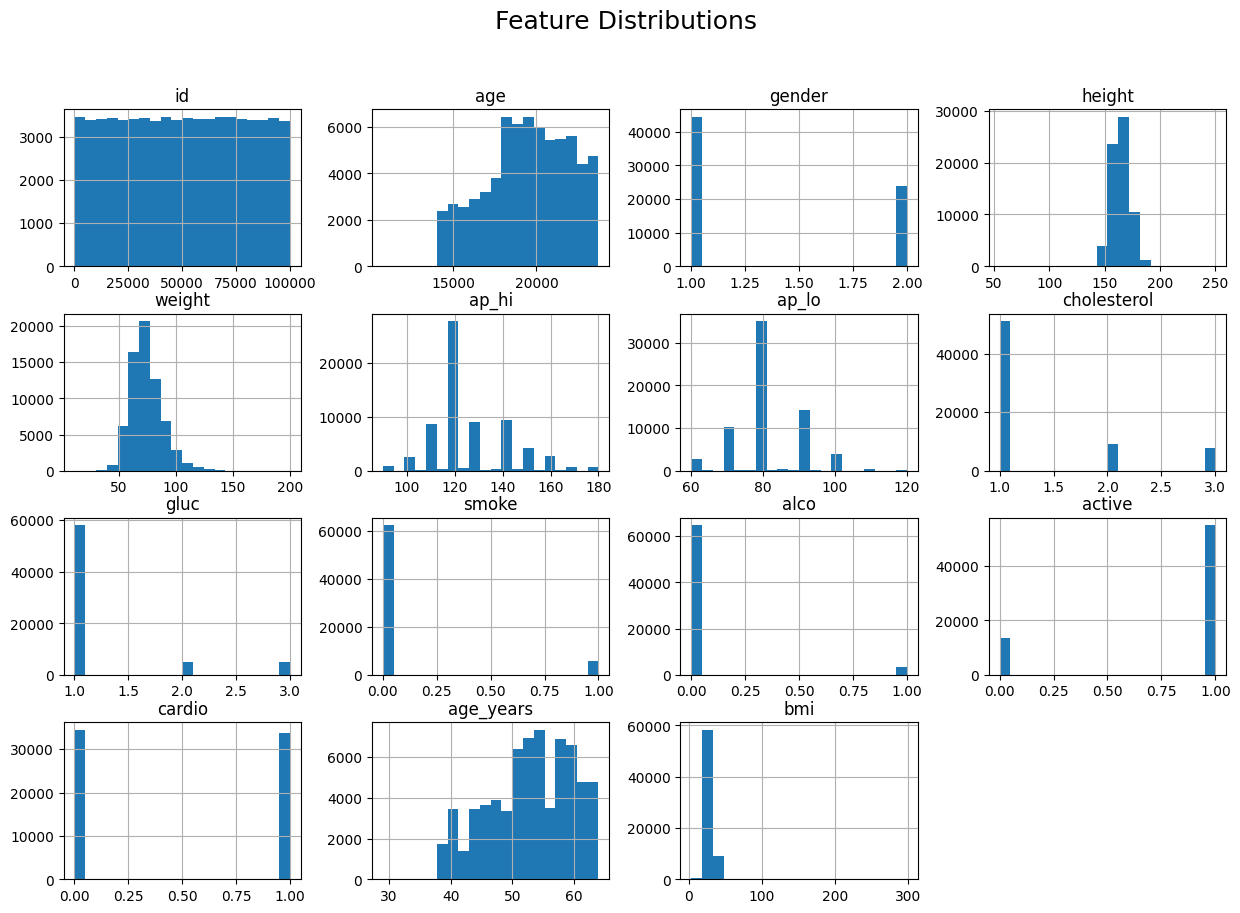

In [7]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions", fontsize=18)
plt.show()


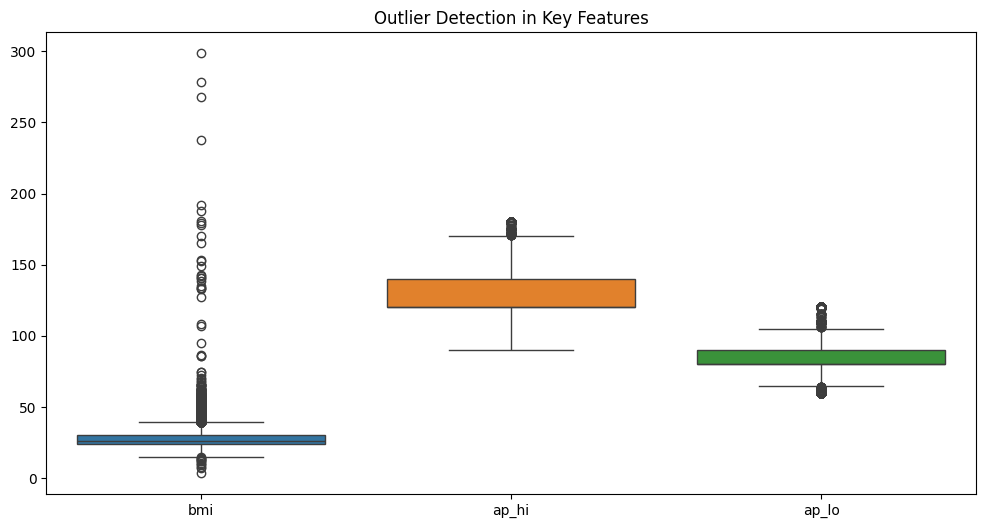

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['bmi', 'ap_hi', 'ap_lo']])
plt.title("Outlier Detection in Key Features")
plt.show()

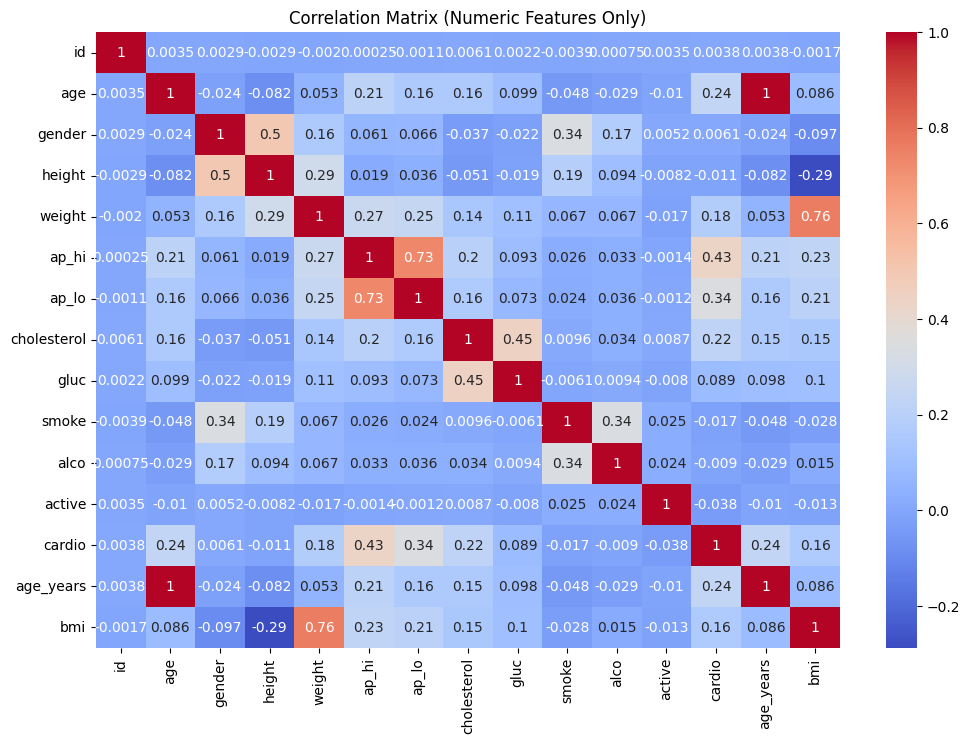

In [8]:
# Only use numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


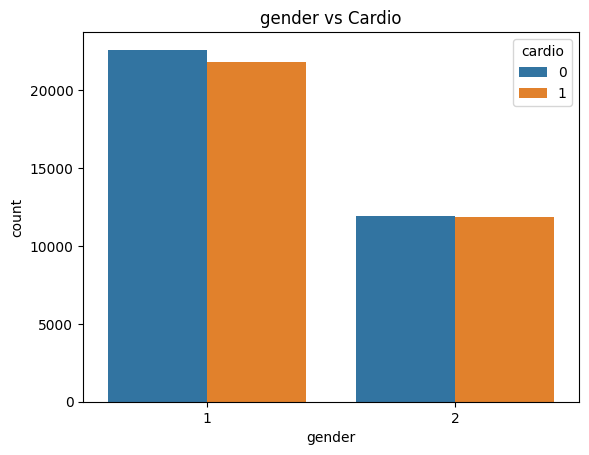

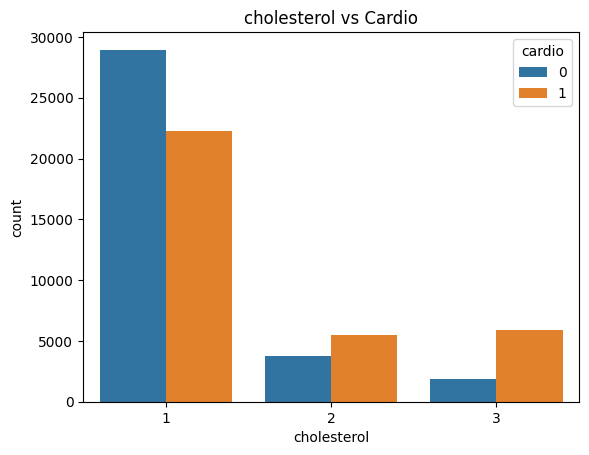

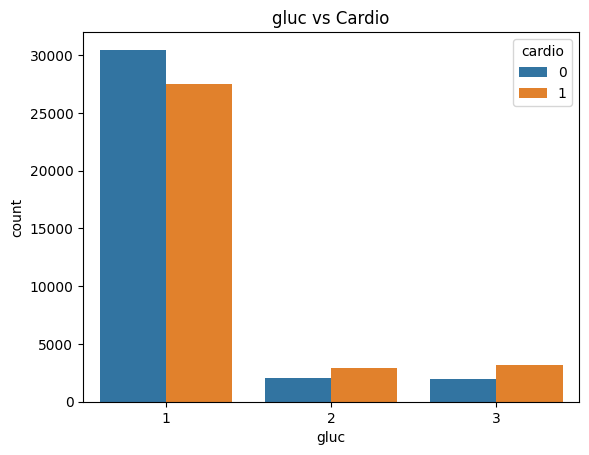

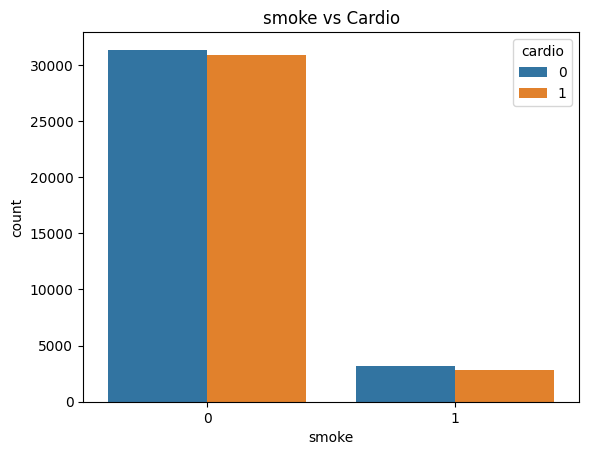

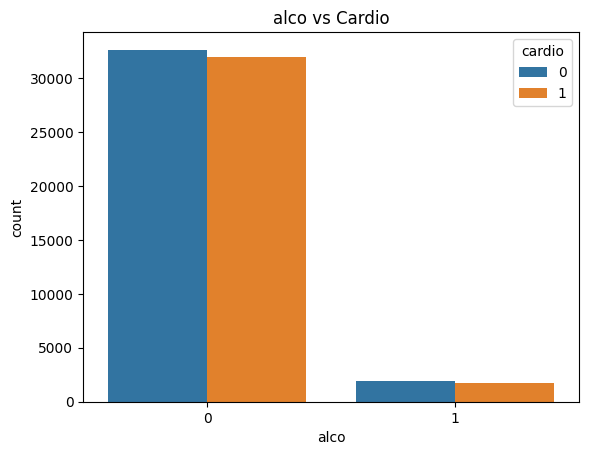

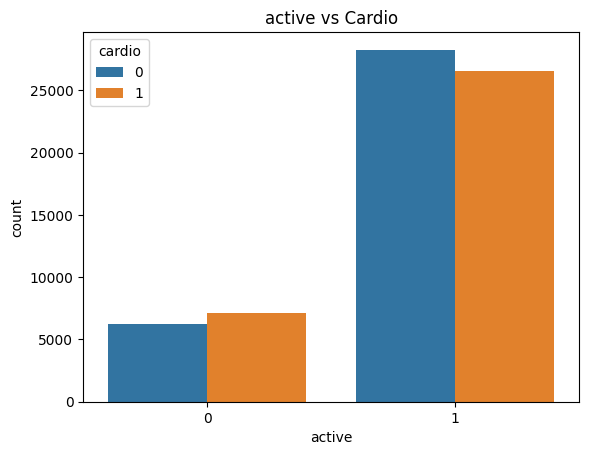

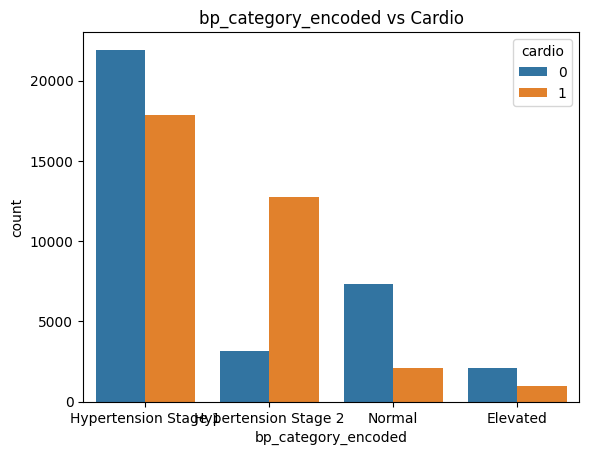

In [9]:
cat_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp_category_encoded']
for col in cat_features:
    sns.countplot(data=df, x=col, hue='cardio')
    plt.title(f"{col} vs Cardio")
    plt.show()

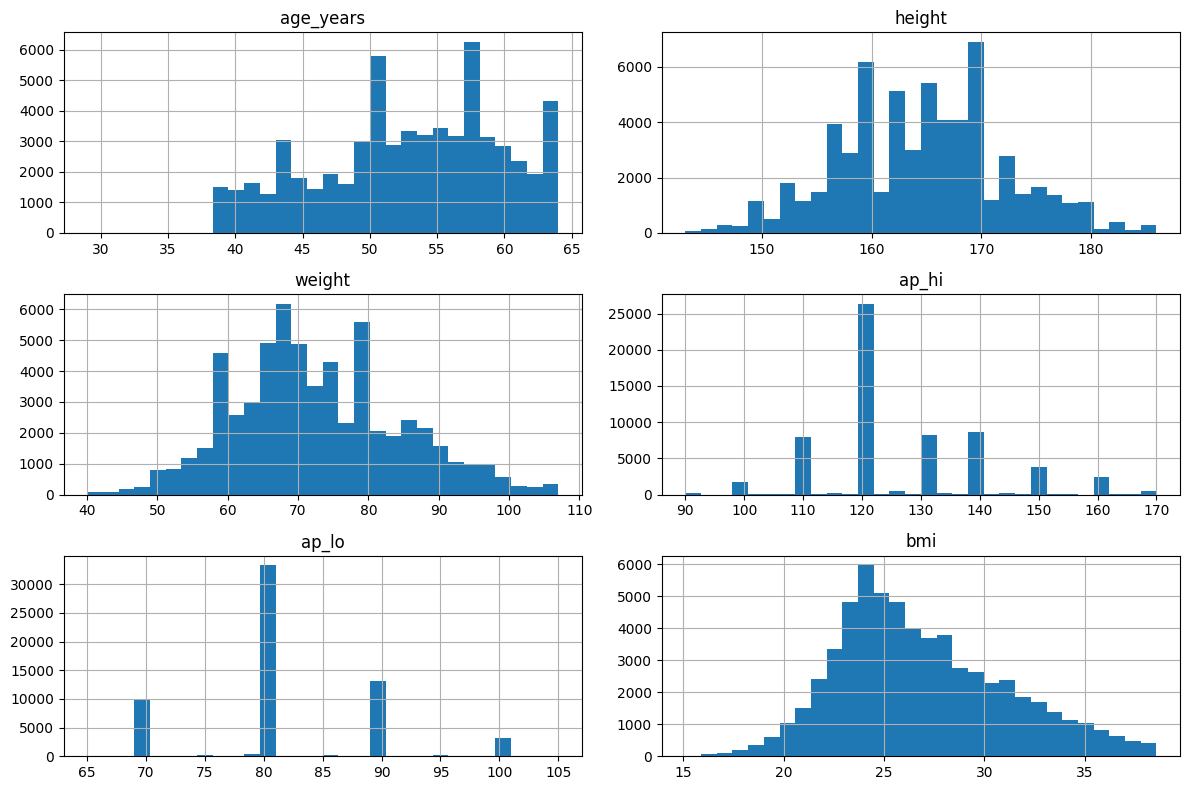

In [13]:
num_cols = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']
df[num_cols].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

In [10]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in ['height', 'weight', 'ap_hi', 'ap_lo', 'bmi']:
    df = remove_outliers(df, col)


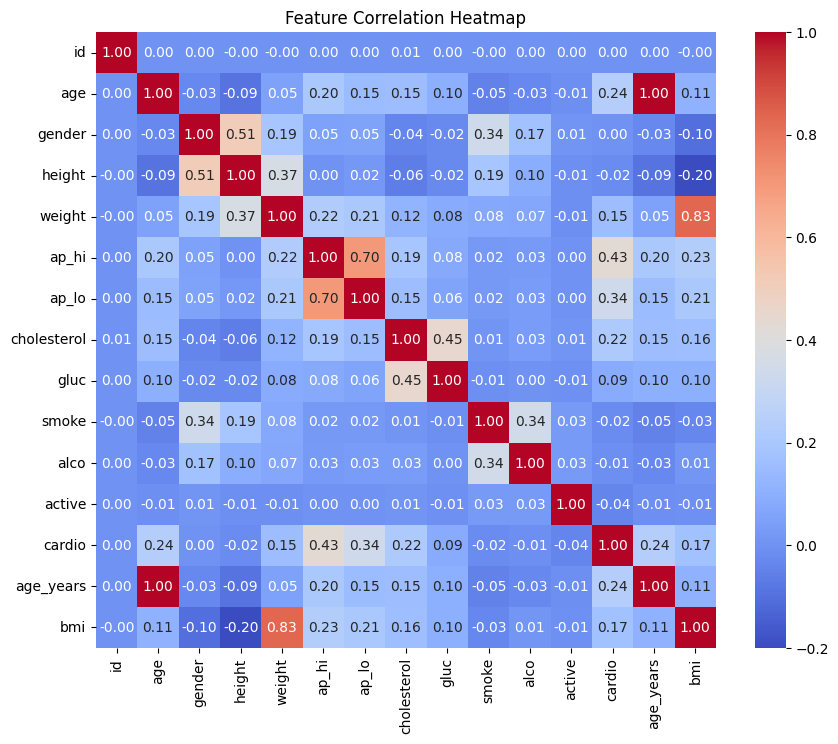

In [11]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


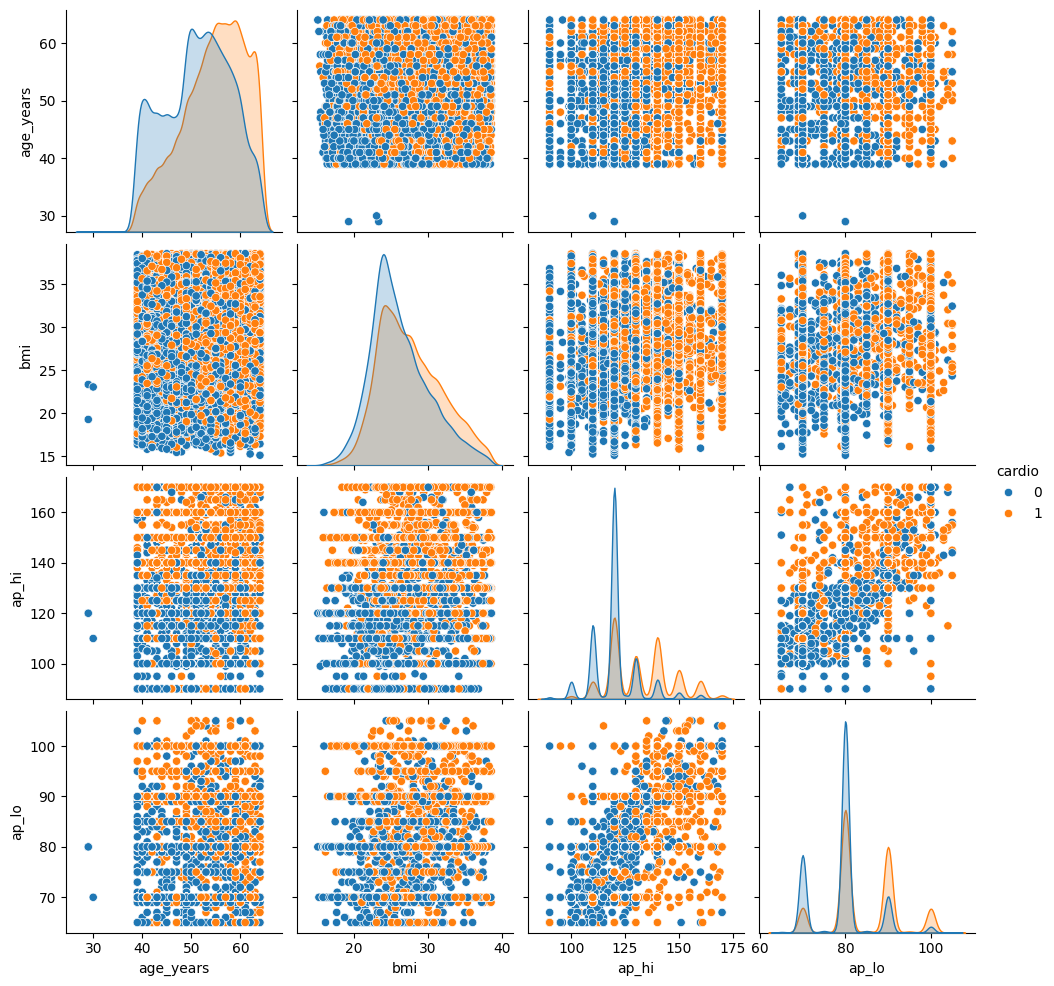

In [12]:
sns.pairplot(df[['age_years', 'bmi', 'ap_hi', 'ap_lo', 'cardio']], hue='cardio')
plt.show()


In [25]:
label_enc = LabelEncoder()
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp_category']
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

In [15]:
df.dropna(inplace=True)


In [26]:
# Standardize numerical features (excluding target)
scaler = StandardScaler()
features_to_scale = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [27]:
df.to_csv('cleaned_cardio_data.csv', index=False)

print("\n✅ Dataset cleaned and saved as 'cleaned_cardio_data.csv'")


✅ Dataset cleaned and saved as 'cleaned_cardio_data.csv'


Milestone 3: Predictive Model Development and Optimization

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [42]:
df = pd.read_csv("cleaned_cardio_data.csv")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,1,0.458690,-0.903568,-1.143004,-0.212791,0,0,0,0,1,0,-0.426607,-1.166056,1,Hypertension Stage 1
1,1,20228,0,-1.145818,1.038302,0.965567,1.095187,2,0,0,0,1,1,0.314475,1.919724,2,Hypertension Stage 2
2,2,18857,0,0.057563,-0.734710,0.262710,-1.520768,2,0,0,0,0,1,-0.278390,-0.799235,1,Hypertension Stage 1
3,3,17623,1,0.592399,0.785015,1.668424,2.403165,0,0,0,0,1,1,-0.723039,0.439470,2,Hypertension Stage 2
4,8,21914,0,-1.814362,-0.481423,-0.440147,-0.212791,1,1,0,0,0,0,1.055557,0.599990,1,Hypertension Stage 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61327,99991,19699,0,0.993526,-0.228135,0.262710,1.095187,0,0,0,0,1,1,0.018043,-0.762656,1,Hypertension Stage 1
61328,99992,21074,0,0.057563,0.616157,1.668424,-0.212791,0,0,0,0,1,1,0.610908,0.600009,1,Hypertension Stage 1
61329,99993,19240,1,0.458690,0.278440,-0.440147,-0.212791,0,0,1,0,1,0,-0.130174,0.014946,1,Hypertension Stage 1
61330,99998,22431,0,-0.209855,-0.059277,0.614138,-0.212791,0,1,0,0,0,1,1.203774,0.055853,1,Hypertension Stage 1


In [47]:
X_encoded = X.copy()

for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 3: Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
from sklearn.svm import LinearSVC

models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC(max_iter=10000)
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Results for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("="*60)


Results for Random Forest:
[[4746 1515]
 [1911 4095]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      6261
           1       0.73      0.68      0.71      6006

    accuracy                           0.72     12267
   macro avg       0.72      0.72      0.72     12267
weighted avg       0.72      0.72      0.72     12267

Accuracy: 0.7207141110295916
Results for Logistic Regression:
[[5021 1240]
 [2085 3921]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6261
           1       0.76      0.65      0.70      6006

    accuracy                           0.73     12267
   macro avg       0.73      0.73      0.73     12267
weighted avg       0.73      0.73      0.73     12267

Accuracy: 0.7289475829461156
Results for Linear SVM:
[[5087 1174]
 [2156 3850]]
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      6261
           1  

In [56]:
from sklearn.metrics import accuracy_score

best_model = None
best_score = 0
best_name = ""

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    
    if acc > best_score:
        best_score = acc
        best_model = model
        best_name = name

print(f"\nBest Model: {best_name} with accuracy {best_score:.4f}")


Random Forest Accuracy: 0.7240
Logistic Regression Accuracy: 0.7289
Linear SVM Accuracy: 0.7285

Best Model: Logistic Regression with accuracy 0.7289


In [58]:
# Save model
import joblib
joblib.dump(rf, "final_model.pkl")

['final_model.pkl']

Milestone 4: MLOps, Deployment, and Monitoring

In [62]:
import sys
print(sys.executable)


c:\Users\hp\miniconda3\python.exe


In [64]:
# app.py (Flask Deployment)

from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

model = joblib.load("final_model.pkl")

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    features = np.array(data['features']).reshape(1, -1)
    prediction = model.predict(features)[0]
    return jsonify({'cardio_risk': int(prediction)})

if __name__ == '__main__':
    app.run(debug=True)


ModuleNotFoundError: No module named 'flask'